ALGERIAN FOREST FIRES DATASET

##DATASET INFORMATION


THE DATASET INCLUDES 244 INSTANCES THAT REGROUP A DATA OF TWO REGIONS OF AKGERIA,NAMELY NORTHEAST  ALGERIA AND THE SIDI BEL-ABBES REGION


122 INSTANCES OF EACH REGIONSS


THE 244 INSTANCES HAVE BEEN CLASSIFIED INTO FIRE(138 CLASSES) ANND NON FIRE (106 CLASSES)

In [1]:
##PERFORMING EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('Algerian_forest_fires_dataset.csv')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [3]:
##we are gonna merge both dataset  and by removinf header

dataset=pd.read_csv('Algerian_forest_fires_dataset.csv')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [5]:
##data clean


#check on missing value
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [6]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
##since datast is divided to  2 regions
#we create a new column were one region  is assigned to 0 while the other region is assigned to  1


dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [8]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
243,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
244,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
245,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [9]:
##i want to store the region value as int

df[['Region']]=df[['Region']].astype(int)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
##to remove null values
##try to remove 122  rows and
df=df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [12]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [13]:
##since it is the heading we also want to drop this so

#removing 122th row
df=df.drop(122).reset_index(drop=True)


In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [16]:
##fix spaces in column name
df.columns=df.columns.str.strip()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [18]:
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [19]:
objects=[feature for feature in df.columns if df[feature].dtypes == 'O']
#O - object class,IN REGION we dont have object class so it is not included


In [20]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [21]:
for i in objects:
    if i!='Classes':
        df[i]=df[i].astype(float)

In [22]:
df.info()
##as you can see can see classes did not change
#because wile iterating through objects ,
# and classes must be object since it is categorical feature
#   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


basic eda is completed above

In [24]:
##convert the entire dataset to csv such that that csv will have cleaned csc
df.to_csv('ArithmeticError_cleaned.csv',index=False)

EXPLORATORAY DATAA ANALYSSIS

In [25]:
df_copy=df

In [26]:
df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [27]:
##we can drop day mont and year

df_copy=df_copy.drop(['day','month','year'],axis=1)

In [28]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [29]:
##categories in classes

df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [30]:
##encoding of the categories in classes
df_copy['Classes']=np.where(df_copy['Classes']=='not fire',0,1)

In [31]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [32]:
df_copy['Classes'].value_counts()

Classes
1    241
0      2
Name: count, dtype: int64

In [33]:
##As you can see 1 is 241 there is some problem inn assigning fire and not fire

##in cel 71 you can see
##there are different categories
#3to fix this

##str.contains('not fire')--so were and all there are not fire it will replace by 0


df_copy['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0, 1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [35]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

C:\Users\monii\AppData\Local\Temp\ipykernel_18436\4072167186.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


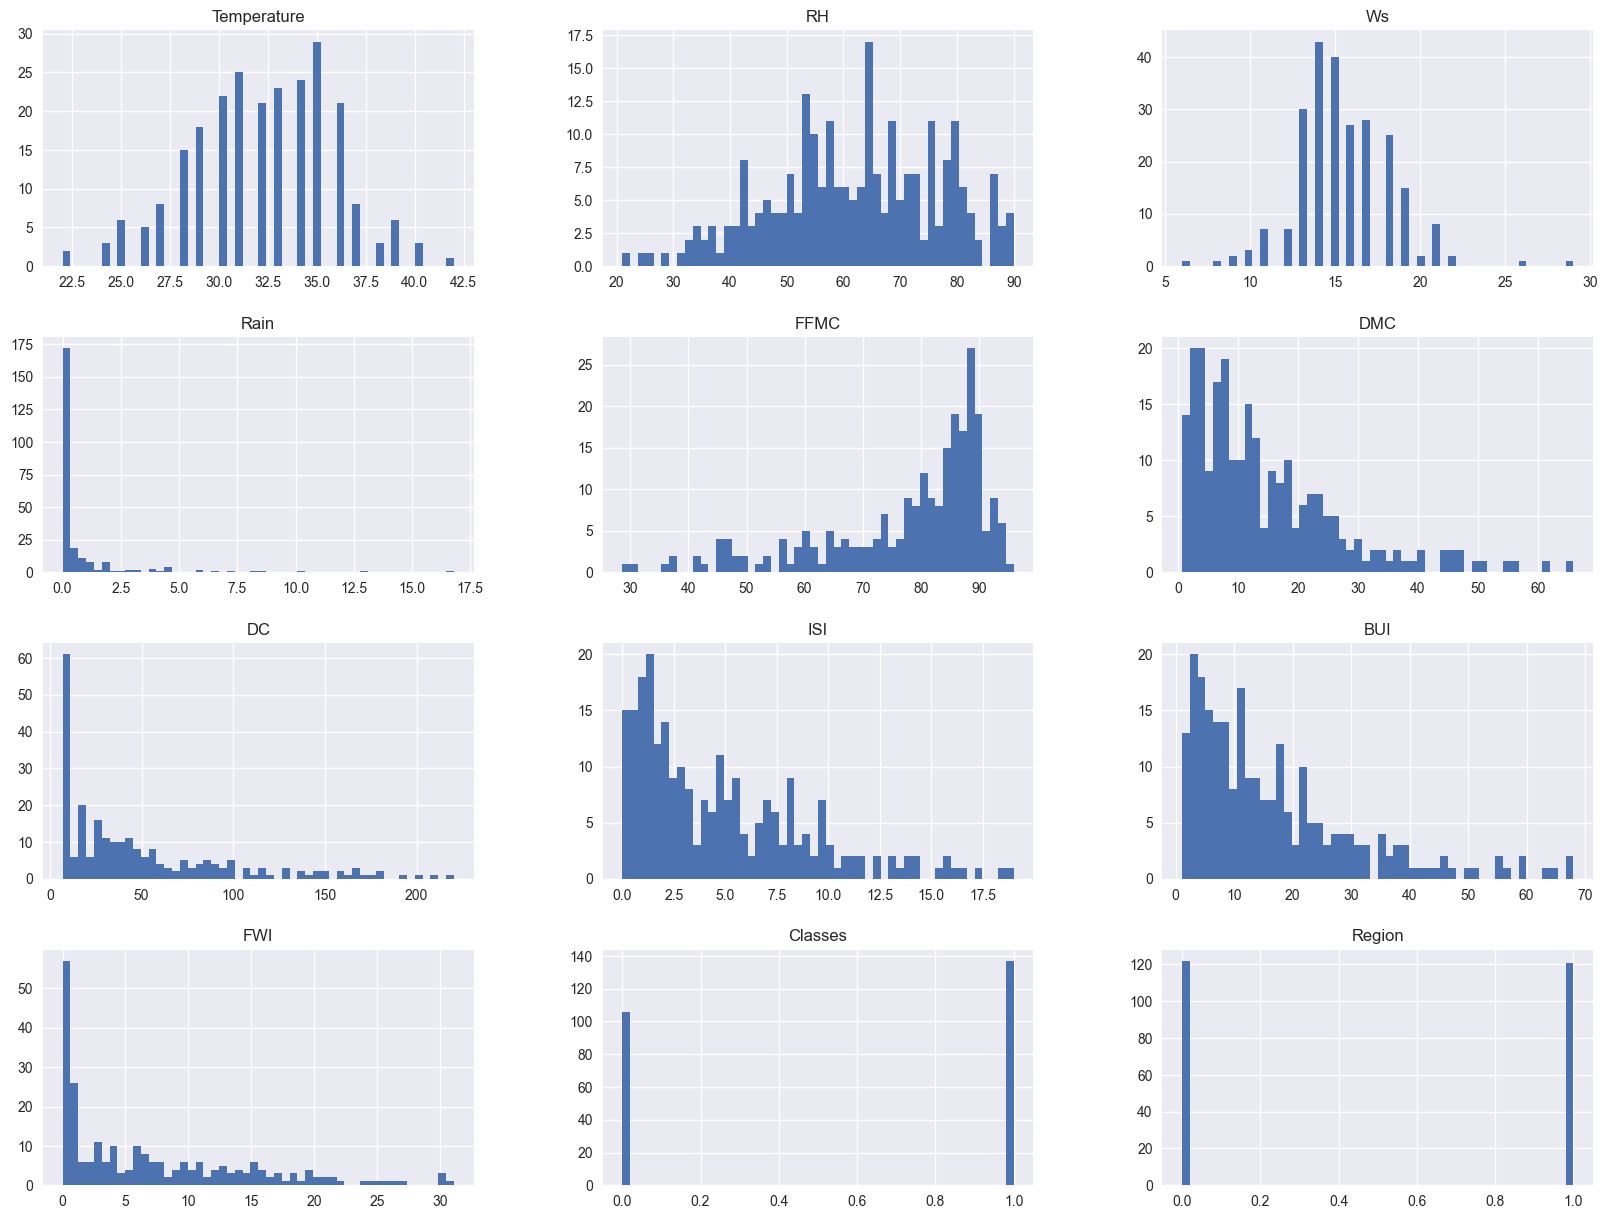

In [36]:
##plot density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [37]:
##percentage for pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

Text(0.5, 1.0, 'pie chart of classes')

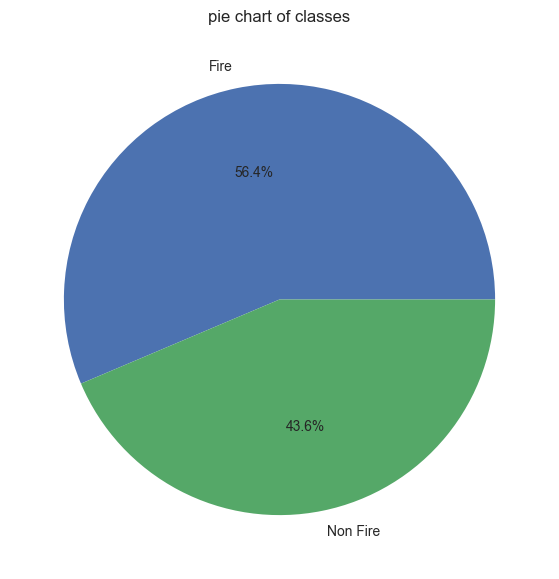

In [38]:
##ploting pie cchart
classlabels=["Fire","Non Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct="%1.1f%%")
plt.title("pie chart of classes")

In [39]:
##correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

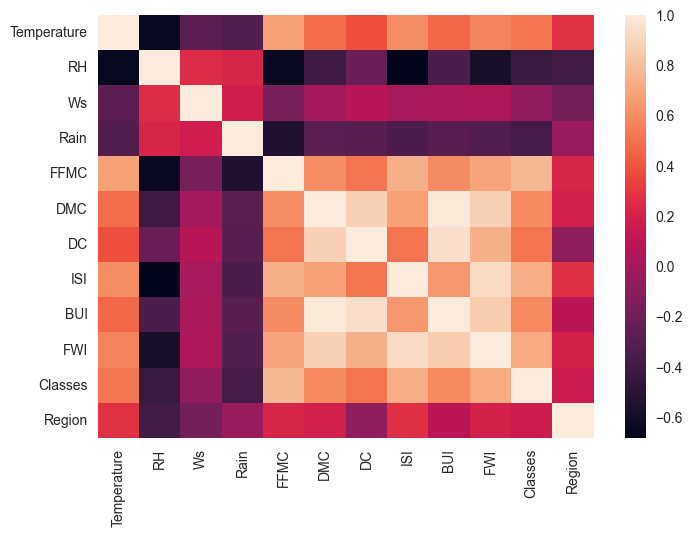

In [40]:
sns.heatmap(df_copy.corr())
##the  lighter side it is more higly coreelated

<Axes: ylabel='FWI'>

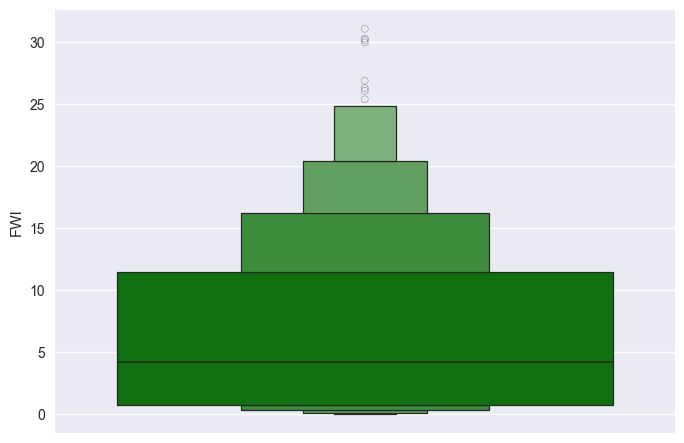

In [41]:
##boox plots  just to check out how outliers workout
sns.boxenplot(df_copy['FWI'],color='green')

In [42]:

df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 'not fire', 'fire')

Text(0.5, 1.0, 'Fire analyssis sedi-bel regions')

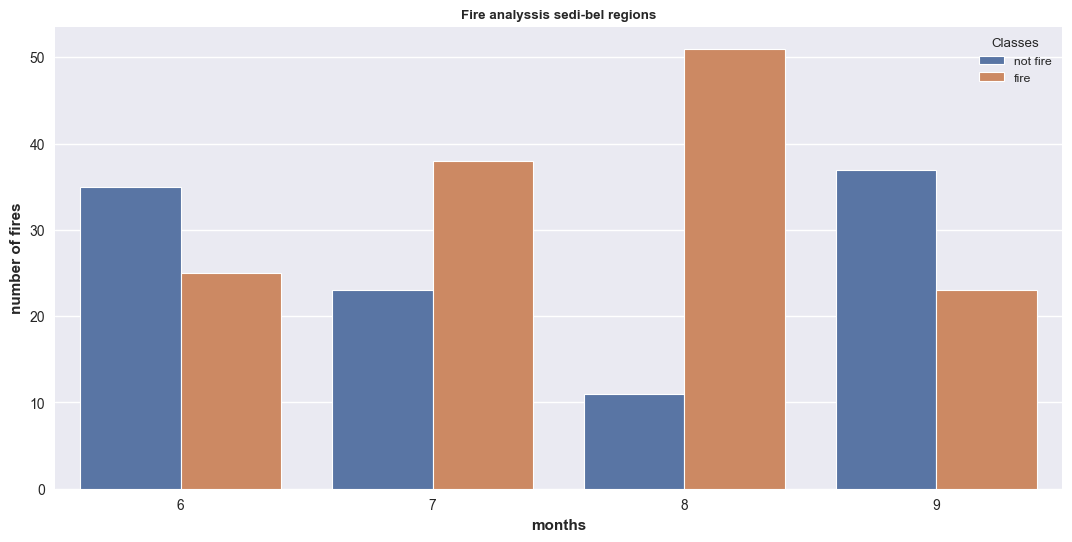

In [43]:
##the monthly fire analysis

dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_theme('paper')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('number of fires',weight='bold')
plt.xlabel('months',weight='bold')
plt.title("Fire analyssis sedi-bel regions",weight='bold')

##able to categorize data based on classes

Text(0.5, 1.0, 'Fire analyssis brjajia  regions')

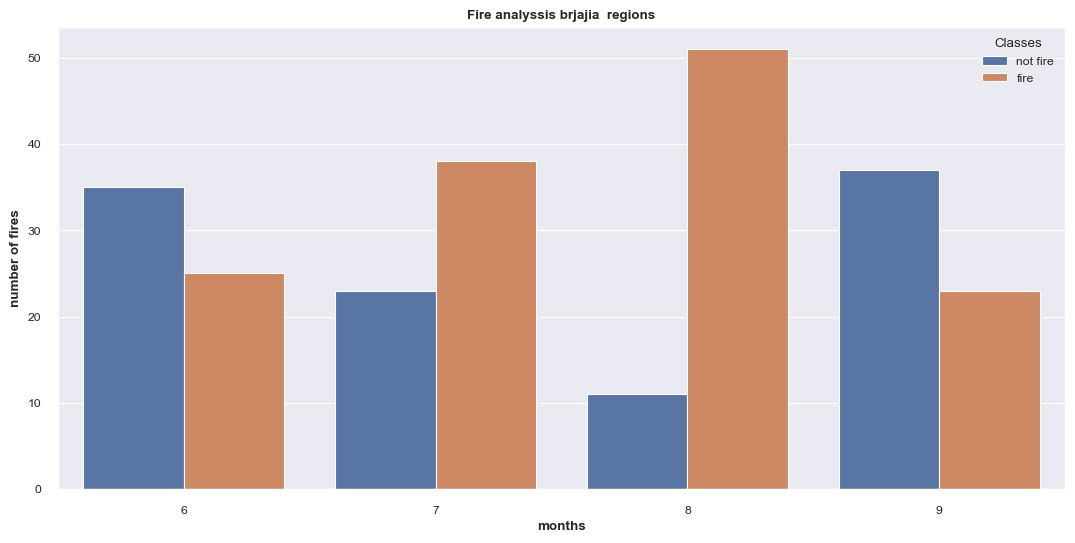

In [44]:
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_theme('paper')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('number of fires',weight='bold')
plt.xlabel('months',weight='bold')
plt.title("Fire analyssis brjajia  regions",weight='bold')

it is observed that august and september had the most number of forest fires for both regiona
most of the fires happened in august an dvery high fires happened in only 3 month -june,july,august

les fire was on september

------------------Model Training----------------


In [45]:
df=pd.read_csv('Algerian_cleaned.csv')

In [46]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [48]:
##since we dont want month day and year

##since we want to drop all the columns we use axis =1

##inplace=true (so in the existing df file it will be changed)
df.drop(['day', 'month', 'year'],axis=1)

df.drop(['day', 'month', 'year'],axis=1,inplace=True)

In [49]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [50]:
##one issue in classes we do have lot of categorises
# at the end of the day  we have 2 categories
# so we do encoding to avoid 

df['Classes'].value_counts()




Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [51]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [52]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [53]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [54]:
##independent and dependent feature
X=df.drop('FWI',axis=1)
y=df['FWI']

In [55]:

#independent feature
##SO WE can  also use iloc
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [56]:

##dependent features
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
print(X_train.shape)

print(X_test.shape)

(182, 11)
(61, 11)


In [59]:
##Feature selection base on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [60]:
##but highly  positively correlated -u should try to remove  it
 ##negative correlated can be an imp feature

<Axes: >

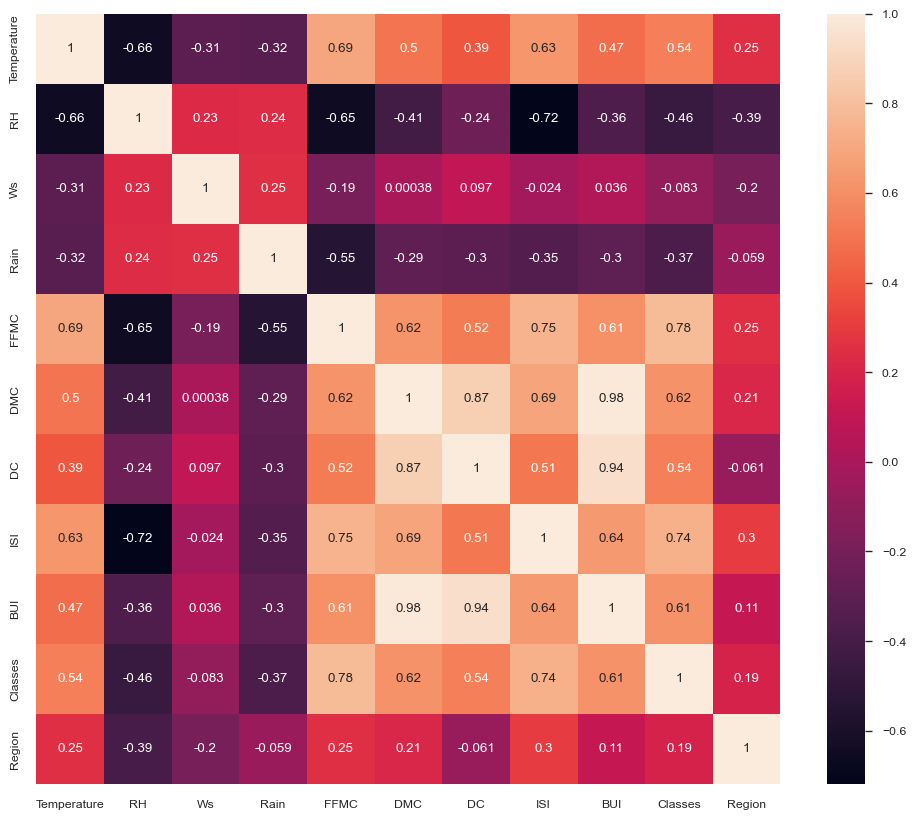

In [61]:
##heck for multi  colinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [62]:
##corelation function
##to remove if it is greater than the threshold
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

    ##TO HANDLE BOTH POSITIVE AND  NEGATIVVE WE CHOOSE ABS


In [63]:
correlation(X_train,0.85)
corr_features=correlation(X_train,0.85)



##as u can see in bui 0.98%
##i can also deleete it

In [64]:
##threshold is decided by domain expertise
##droping these features when corelation is more than threshold

X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape





((182, 9), (61, 9))

In [65]:
###imp step
##Feature scaling or standardization before training model


In [66]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()


In [67]:
X_train_s=scalar.fit_transform(X_train)
X_test_s=scalar.transform(X_test)

In [68]:
##how outliers look wrt to data
##box plot to understand the effetct of standard scalar

C:\Users\monii\AppData\Local\Temp\ipykernel_18436\2883742.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

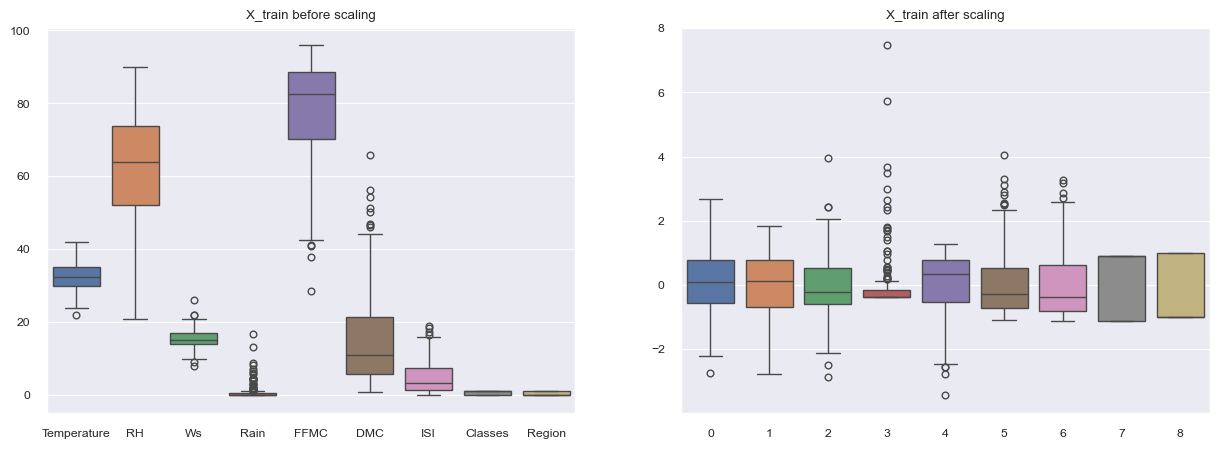

In [69]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_s)
plt.title('X_train after scaling')

AS U CAN SEE ALMOST EVERYTHING ARE IN SAME SCALE

Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.


Ridge : Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the
size of the coefficients with l2 regularization.

Lasso : The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

ElasticNet : Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the
coefficients.

mean absolute  error 32.63239756717751
r2 score -42.735439282843615
mean absolute  error 32.63239756717751
r2 score 0.9847657384266951


c:\Users\monii\anaconda3\anacondanew3\envs\genai\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


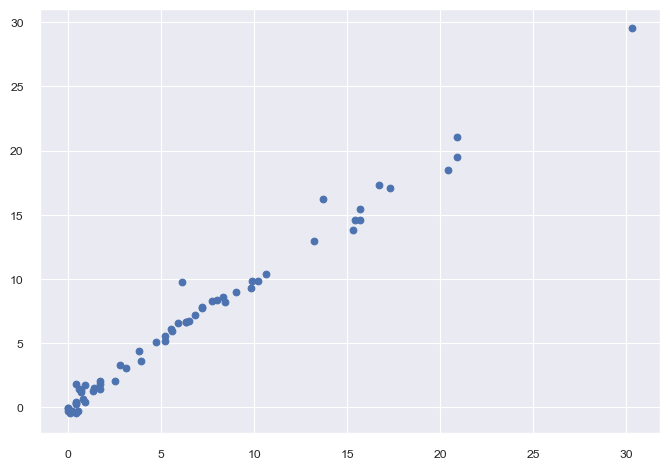

In [70]:
##MODEL TRAINING


##LINEAR REGRESSION

from sklearn.linear_model import  LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()

linreg.fit(X_train_s,y_train)
y_pred=linreg.predict(X_test)


mae=mean_absolute_error(y_test,y_pred)

score=r2_score(y_test,y_pred)
print("mean absolute  error",mae)
print("r2 score",score)

y_pred=linreg.predict(X_test_s)

score=r2_score(y_test,y_pred)

print("mean absolute  error",mae)
print("r2 score",score)




##As we get r2  is negate wtr to xtest data
##if we try with x_test_S data 

plt.scatter(y_test,y_pred)





mean absolute  error 1.133175994914409
r2 score 0.9492020263112388


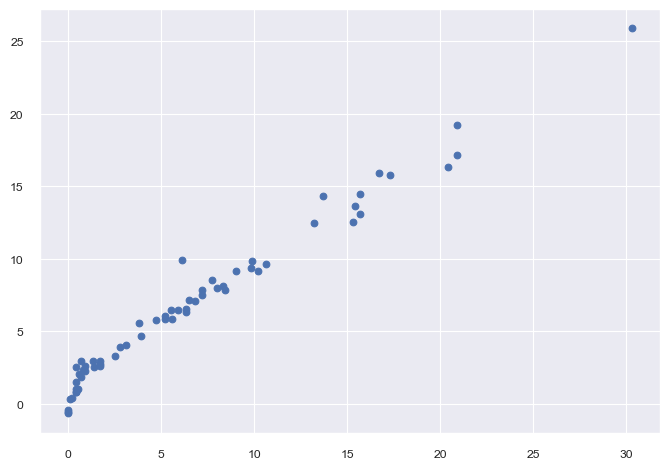

In [71]:
##LASSO REGRESSION MODEL



from sklearn.linear_model import  Lasso

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso=Lasso()

lasso.fit(X_train_s,y_train)

y_pred=lasso.predict(X_test_s)

score=r2_score(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)

print("mean absolute  error",mae)
print("r2 score",score)

plt.scatter(y_test,y_pred)










mean absolute  error 0.5642305340105715
r2 score 0.9842993364555512


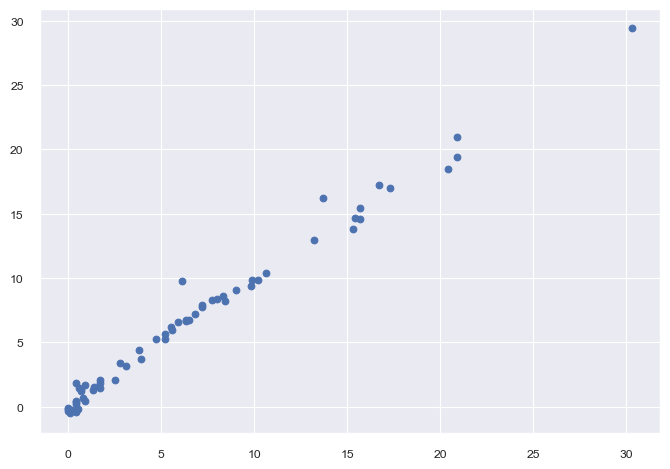

In [72]:
##Riidge regreesion model

from sklearn.linear_model import  Ridge

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()

ridge.fit(X_train_s,y_train)

y_pred=ridge.predict(X_test_s)

score=r2_score(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)

print("mean absolute  error",mae)
print("r2 score",score)

plt.scatter(y_test,y_pred)

mean absolute  error 1.8822353634896005
r2 score 0.8753460589519703


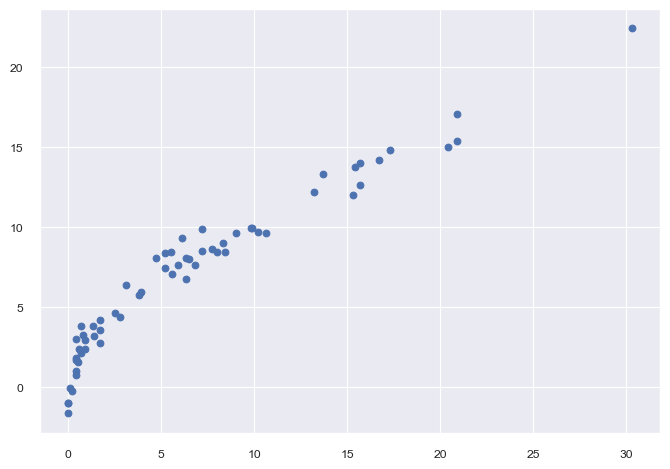

In [73]:
##to combine both of them elastic  net regression 

from sklearn.linear_model import ElasticNet

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()

elastic.fit(X_train_s,y_train)

y_pred=elastic.predict(X_test_s)

score=r2_score(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)

print("mean absolute  error",mae)
print("r2 score",score)

plt.scatter(y_test,y_pred)

In [74]:
##lasso cv is used for cross validation

##one hyperparameter tuning is called  is cross  validataion

##and select best parameters

CROSS VALIDATION USING LASO

Lasso linear model with iterative fitting along a regularization path.



The best model is selected automatically using cross-validation.

**Parameters:**

- `cv`: Number of folds for cross-validation. If not set, defaults to 5-fold cross-validation.
- `selection`: Can be `'cyclic'` (default) or `'random'`.  
    - `'cyclic'`: Loops over features sequentially.
    - `'random'`: Updates a random coefficient each iteration, which can speed up convergence, especially when `tol` is higher than 1e-4.
- `tol`: Tolerance for the optimization. Training stops when the improvement in the objective function is less than this value. Lower values mean more precise solutions but may take longer to compute.

Cross-validation helps to find the optimal regularization parameter (`alpha`) for the Lasso model.

In [75]:
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)

lassocv.fit(X_train_s,y_train)

##the entire class lassocv  is gonna givve you alpha  value
##since alpaha is also one of the parmaeter to ridge,lasso




LassoCV(cv=5)

In [ ]:
lassocv.alphas_

##it basically try the alpha values




array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [ ]:
lassocv.mse_path_

##wtr to each path we find mean square error

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [76]:
lassocv.predict(X_test_s)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

mae= 0.619970115826343
r2score= 0.9820946715928275


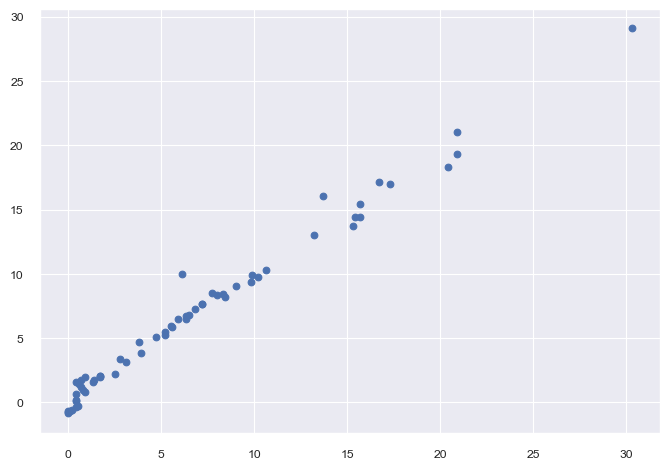

In [80]:
y_pred=lassocv.predict(X_test_s)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae=",mae)
print("r2score=",score)

In [ ]:
##for ridge regression we have ridge cv

from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()

# it performs efficient Leave-One-Out Cross-Validation.

##LEAVE ONE OUT CV-it meant if cv=none,so it is gonna take one as test dataset for the first experiment and remaing all for training dataset
# sp only one is at a time it take as a test dataset remainng all it takes as a test dataset
 

mae= 0.5642305340105715
r2score= 0.9842993364555512


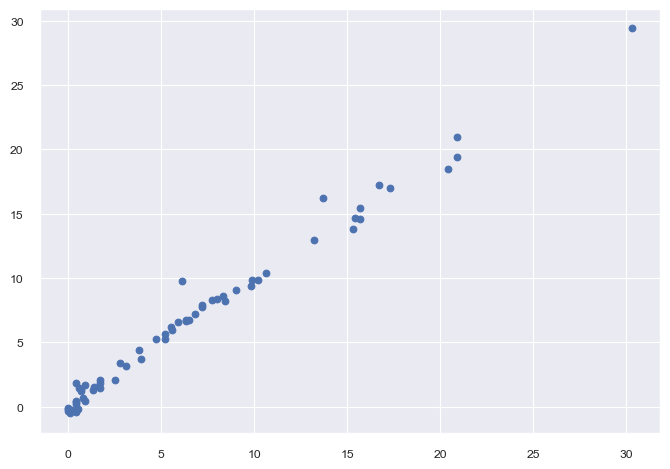

In [ ]:
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_s,y_train)

y_pred=ridgecv.predict(X_test_s)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae=",mae)
print("r2score=",score)

##good result in cross validation


In [ ]:
ridgecv.alphas
##this alphas were tried and gave result based on best alpha

(0.1, 1.0, 10.0)

mae= 0.6575946731430898
r2score= 0.9814217587854941


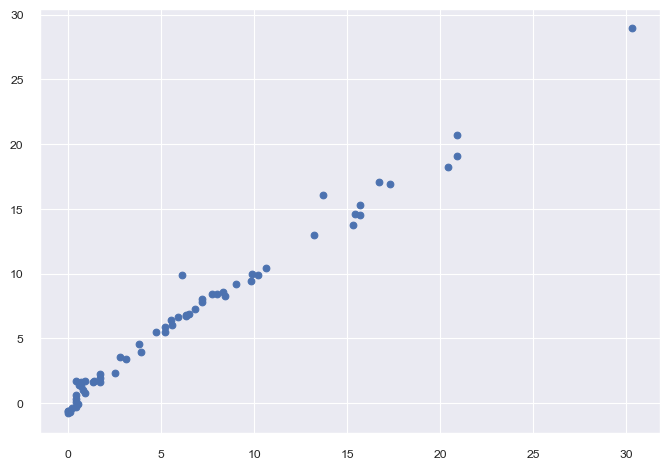

In [ ]:
from sklearn.linear_model import ElasticNetCV
elasticv=ElasticNetCV(cv=5)
elasticv.fit(X_train_s,y_train)
y_pred=elasticv.predict(X_test_s)
plt.scatter(y_test,y_pred)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mae=",mae)
print("r2score=",score)
##based on parameters of elastic net  the l1 focuses on 50%norm and l2 norm it focuses onn other 50%norm


In [88]:
elasticv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11